In [191]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [192]:
# 1. Load the dataset and explore the variables.

In [193]:
pd.read_csv('customer_churn.csv')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [194]:
# 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [216]:
df = pd.read_csv('customer_churn.csv')
df = df[['tenure','SeniorCitizen','MonthlyCharges','Churn']]
display(df.head())
display(df.shape)
display(df.dtypes)
display(df.isna().sum())
display(df['tenure'].unique()) 
display(df['SeniorCitizen'].unique()) 
display(df['MonthlyCharges'].unique()) # needs a closer look
display(df['Churn'].unique()) # target

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


(7043, 4)

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
Churn              object
dtype: object

tenure            0
SeniorCitizen     0
MonthlyCharges    0
Churn             0
dtype: int64

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

array([0, 1], dtype=int64)

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

array(['No', 'Yes'], dtype=object)

In [196]:
# 3. Extract the target variable.

In [197]:
# y - split
new_churn = []
for value in df['Churn']:
    if value == 'Yes':
        new_churn.append(1)
    else:
        new_churn.append(0)

df['Churn'] = new_churn
target = df['Churn']
target.head(5)

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [198]:
# 4. Extract the independent variables and scale them.

In [199]:
# X - split
feature = df.drop("Churn",axis = 1)
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   SeniorCitizen   7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 165.2 KB


In [200]:
# scaling after X-y-split 
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=0) 
display('X_train:',X_train.shape)
display('y_train:',y_train.shape)
display('X_test:',X_test.shape)
display('y_test:',y_test.shape)

'X_train:'

(5282, 3)

'y_train:'

(5282,)

'X_test:'

(1761, 3)

'y_test:'

(1761,)

In [201]:
#from sklearn.preprocessing import MinMaxScaler
# Scaling data
# no split needed in numerical and categorical data
transformer = MinMaxScaler().fit(X_train) # need to keep transformer
X_train_normalized = transformer.transform(X_train)
X_train_norm = pd.DataFrame(X_train_normalized, columns = feature.columns)
X_train_norm.head()

,tenure,SeniorCitizen,MonthlyCharges
0,0.333333,0.0,0.309263
1,0.750000,1.0,0.468127
2,0.041667,0.0,0.218127
3,0.847222,0.0,0.019920
4,0.166667,0.0,0.659363


In [202]:
X_test_normalized = transformer.transform(X_test)
X_test_norm = pd.DataFrame(X_test_normalized, columns = feature.columns)
X_test_norm.head()

,tenure,SeniorCitizen,MonthlyCharges
0,0.263889,0.0,0.397908
1,0.833333,0.0,0.979582
2,0.180556,0.0,0.534861
3,0.013889,0.0,0.021912
4,0.763889,0.0,0.592629


In [203]:
y_train = y_train.reset_index(drop=True)
display(y_train.head())

y_test = y_test.reset_index(drop=True) 
display(y_train.head())

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [204]:
# 5. Build the logistic regression model.

C:\Users\Martin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    5174
1    1869
Name: Churn, dtype: int64

'model accuracy:'

0.7825099375354913

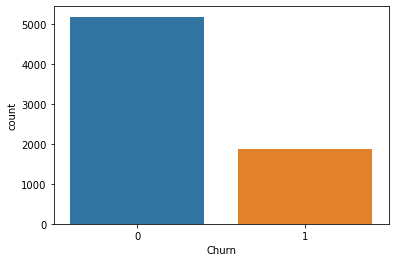

In [205]:
# from sklearn.linear_model import LogisticRegression

# target variable imbalance
sns.countplot(target)
display(target.value_counts())

# score with imbalance
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_norm, y_train)
display('model accuracy:',LR.score(X_test_norm, y_test))

In [206]:
# 6. Evaluate the model.

In [207]:
pred = LR.predict(X_test_norm)
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))


precision:  0.6176470588235294
recall:  0.4535637149028078
f1:  0.5230386052303861


In [208]:
# 0 = No, 1 = Yes
# confusion matrix
display(confusion_matrix(y_test,pred))
display(y_test.value_counts())

array([[1168,  130],
       [ 253,  210]], dtype=int64)

0    1298
1     463
Name: Churn, dtype: int64

In [209]:
# precision : 61% are churners
# recall : only 45% of churners are classified as churners

In [210]:
# 7. Even a simple model will give us more than 70% accuracy. Why?

In [211]:
# Because of the imbalance. Every prediction is in favor of the majority.

In [212]:
# 8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. 
# Build and evaluate the logistic regression model. Is it there any improvement?

In [213]:
sm = SMOTE(random_state=100,k_neighbors=3) # no difference in 3 or 5 neighbors
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_norm,y_train)


# fitting balanced target in model
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)

X_train_SMOTE.shape

(7752, 3)

In [214]:
# evaluating again

pred = LR.predict(X_test_norm)
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

# confusion matrix
confusion_matrix(y_test,pred)

precision:  0.47982708933717577
recall:  0.7192224622030238
f1:  0.5756266205704408


array([[937, 361],
       [130, 333]], dtype=int64)

In [ ]:
# precision is worse 0.62 -> 0.48
# recall is better 0.45 -> 0.72
# f1 is better 0.52 -> 0.57